# Name :- Harshawardhan Chitnis 
# Roll No :- 17 

# Name :- Ishwari Kulkarni
# Roll No :- 34

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math

### Reading the dataset

In [2]:
df = pd.read_csv('temperatures.csv')

In [3]:
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57


In [4]:
df.shape

(117, 18)

In [5]:
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57


### Top Ten temperature data visulation using bar plot

<AxesSubplot:title={'center':'Top 10 temperature records'}, xlabel='YEAR', ylabel='AUG'>

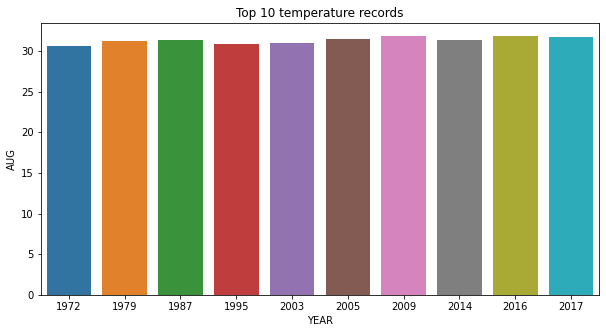

In [6]:
top_10_data = df.nlargest(10,"JUN")
plt.figure(figsize=(10,5))
plt.title("Top 10 temperature records")
sns.barplot(x=top_10_data.YEAR, y=top_10_data.AUG)

Text(0, 0.5, 'Temperature in degree celsius')

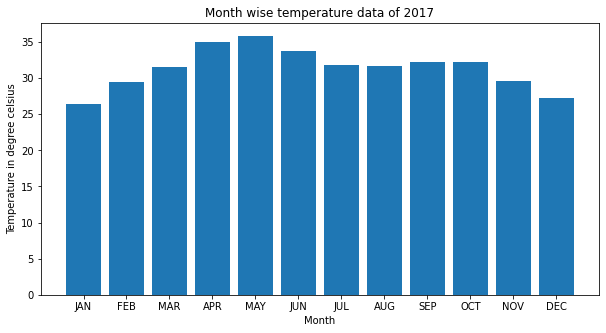

In [7]:
data_2017 = df[df['YEAR']==2017]
xticks = np.array(data_2017[data_2017.columns[1:13]].values)
yticks = data_2017.columns[1:13]
plt.figure(figsize=(10,5))
plt.bar(yticks,xticks[0])
plt.title("Month wise temperature data of 2017")
plt.xlabel("Month")
plt.ylabel("Temperature in degree celsius")

### Train Test Split

In [8]:
X= df.YEAR
Y= df.JAN

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=1)

In [10]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [11]:
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [12]:
preds_train = model.predict(x_train)
preds_train

array([23.39119392, 24.07559954, 23.19777494, 24.64097809, 23.31680201,
       23.45070746, 24.53682941, 23.4953426 , 23.91193733, 24.25414014,
       24.14999146, 23.51022099, 23.71851835, 24.52195103, 24.23926175,
       23.25728848, 23.42095069, 24.47731588, 24.43268073, 22.9745992 ,
       24.10535631, 23.13826141, 24.38804558, 23.52509937, 23.6738832 ,
       23.5846129 , 24.62609971, 23.68876158, 23.30192363, 23.55485614,
       23.27216686, 24.56658618, 24.13511307, 23.64412643, 23.22753171,
       23.95657248, 22.95972082, 24.4624375 , 23.36143716, 24.59634295,
       23.61436967, 24.22438337, 23.03411273, 23.80778865, 22.91508567,
       24.49219426, 23.7631535 , 23.24241009, 23.82266703, 23.8524238 ,
       23.01923435, 24.58146456, 23.10850465, 24.1946266 , 24.26901852,
       24.20950499, 23.92681571, 24.41780235, 23.12338303, 23.34655877,
       23.33168039, 23.07874788, 24.16486984, 23.18289656, 23.21265333,
       23.65900482, 23.28704524, 23.00435597, 23.97145086, 24.04

In [13]:
preds_test = model.predict(x_test)
print("intercept: ", model.intercept_)
print("slope: ", model.coef_)

intercept:  -5.368720380982261
slope:  [0.01487838]


In [14]:
Y_pred = model.predict(x_test)
print('predict response: ', Y_pred, sep = '\t')

predict response: 	[23.94169409 23.59949129 23.77803188 24.61122133 24.00120763 24.3731672
 23.37631554 23.70363997 23.88218056 24.34341043 24.32853205 24.35828882
 22.94484243 23.83754541 24.5517078  23.73339673 24.44755912 24.40292397
 23.89705895 23.56973452 24.06072116 23.16801818 24.12023469 24.01608601
 23.74827512 24.31365367 23.43582907 23.48046422 24.29877529 23.62924805
 23.40607231 23.79291026 24.2838969  23.53997775 23.0638695  24.17974822]


### Calculation

In [15]:
MSE = np.square(np.subtract(y_test, Y_pred))
MSE

69     0.061656
46     0.979093
58     0.200733
114    0.000975
73     0.212712
98     0.645078
31     0.568040
53     0.834738
65     0.051902
96     1.088705
95     0.724998
97     0.166700
2      0.245181
62     0.878991
110    0.138167
55     0.328784
103    0.310872
100    0.001842
66     0.031350
44     1.415468
77     0.212264
17     1.227704
81     0.012048
74     0.750105
56     0.590247
94     0.015963
35     0.112781
38     0.016780
93     0.137808
48     0.463423
33     0.417409
59     0.000167
92     0.215200
42     0.324875
10     0.024377
85     0.324613
Name: JAN, dtype: float64

In [16]:
MSE=mean_squared_error(y_test, Y_pred)

In [17]:
RMSE = (math.sqrt(MSE))
RMSE

0.6176062391309048

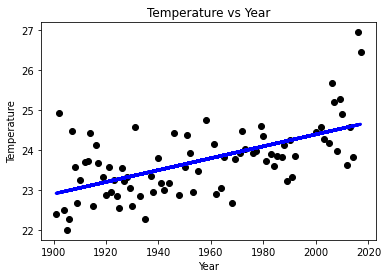

In [18]:
plt.scatter(x_train, y_train, color='black')
plt.plot(x_train, model.predict(x_train), color='blue', linewidth = 3)
plt.title("Temperature vs Year")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.show()

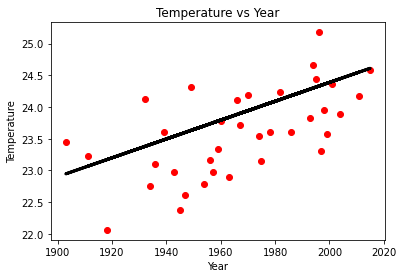

0.18117126438997055

In [19]:
plt.scatter(x_test, y_test, color="red")
plt.plot(x_test, model.predict(x_test), color="black", linewidth=3)
plt.title("Temperature vs Year")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.show()
r2_score(y_test, preds_test)